In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df_avocado = pd.read_csv("avocado.csv")
df_avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20/12/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13/12/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06/12/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29/11/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16/10/16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09/10/16,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02/10/16,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25/09/16,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
df_avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
df_avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
df_avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# EDA

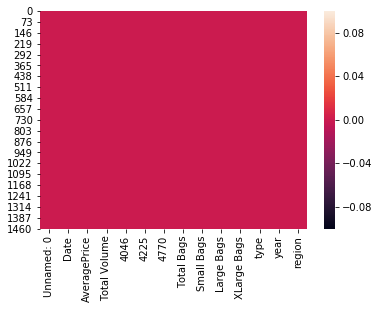

In [6]:
sns.heatmap(df_avocado.isnull())

In [7]:
df_avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [8]:
df_avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20/12/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13/12/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06/12/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29/11/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16/10/16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09/10/16,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02/10/16,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25/09/16,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [9]:
df_avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
df_avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20/12/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13/12/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06/12/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29/11/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16/10/16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09/10/16,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02/10/16,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25/09/16,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [11]:
df_avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20/12/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13/12/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06/12/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29/11/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16/10/16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09/10/16,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02/10/16,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25/09/16,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [12]:
df_avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [13]:
df_avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
df_avocado['type']=label_encoder.fit_transform(df_avocado['type'])

In [16]:
df_avocado['type'].unique()

array([0])

In [17]:
df_avocado['Date']=label_encoder.fit_transform(df_avocado['Date'])

In [18]:
df_avocado['region']=label_encoder.fit_transform(df_avocado['region'])

In [19]:
df_avocado['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [20]:
df_avocado.dtypes

Unnamed: 0        int64
Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
dtype: object

In [21]:
df_avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0
1,1,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0
2,2,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0
3,3,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0
4,4,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,53,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7
1513,11,29,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7
1514,12,5,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7
1515,13,83,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7


In [22]:
df_avocado.skew()

Unnamed: 0     -0.234824
Date            0.012623
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

In [23]:
df_avocado.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,26.995386,50.624918,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,14.848287,30.040469,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.000000,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,14.000000,25.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,29.000000,49.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,39.000000,75.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,51.000000,103.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


In [24]:
for col in df_avocado.columns:
    if df_avocado.skew().loc[col]>0.55:
        df_avocado[col]=np.log1p(df_avocado[col])

In [25]:
df_x = df_avocado.drop(["AveragePrice"], axis=1)
y = df_avocado[["AveragePrice"]]

In [26]:
df_x

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,92,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0,7.608871,0
1,1,68,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0,7.608871,0
2,2,44,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0,7.608871,0
3,3,20,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0,7.608871,0
4,4,98,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0,7.608871,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,53,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,0,7.609367,7
1513,11,29,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,0,7.609367,7
1514,12,5,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,0,7.609367,7
1515,13,83,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,0,7.609367,7


In [27]:
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
1512,1.39
1513,1.51
1514,1.48
1515,1.47


In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [30]:
x

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.81868,1.377766,-1.356762,-1.828162,-0.567524,-1.810613,-1.684725,-1.539248,-0.966743,-0.810775,0.0,-0.441008,-1.314338
1,-1.75131,0.578580,-1.466387,-2.012069,-0.684233,-1.737594,-1.620123,-1.474983,-0.953861,-0.810775,0.0,-0.441008,-1.314338
2,-1.68394,-0.220606,-0.932139,-1.941834,-0.159241,-1.428526,-1.732326,-1.587763,-0.937531,-0.810775,0.0,-0.441008,-1.314338
3,-1.61657,-1.019792,-1.212820,-1.790572,-0.403726,-1.654003,-1.977653,-1.838106,-0.862073,-0.810775,0.0,-0.441008,-1.314338
4,-1.54920,1.577562,-1.516851,-1.869374,-0.694856,-1.637471,-1.932480,-1.800022,-0.748414,-0.810775,0.0,-0.441008,-1.314338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-1.14498,0.079089,-0.598749,-0.109561,-0.547264,0.471494,-0.288452,-0.291023,0.408973,0.753079,0.0,2.267532,-0.880286
1513,-1.07761,-0.720097,-0.646336,-0.230919,-0.592472,0.511204,-0.242463,-0.209250,0.354507,-0.810775,0.0,2.267532,-0.880286
1514,-1.01024,-1.519283,-0.645653,-0.201904,-0.584607,0.453477,-0.252693,-0.227507,0.342751,1.103891,0.0,2.267532,-0.880286
1515,-0.94287,1.078071,-0.605031,-0.135779,-0.576885,0.470688,-0.235255,-0.196878,0.343463,-0.810775,0.0,2.267532,-0.880286


# Modelling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state 
    print("max r2 score corresponding to",final_r_state," is ",max_r_score)
    return final_r_state

In [49]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to random state:  42 is:  0.38748186814436625
r2 score corresponding to random state:  43 is:  0.4268701464587906
r2 score corresponding to random state:  44 is:  0.35969626630412144
r2 score corresponding to random state:  45 is:  0.3274797863098837
r2 score corresponding to random state:  46 is:  0.40439218042559477
r2 score corresponding to random state:  47 is:  0.38337164715654315
r2 score corresponding to random state:  48 is:  0.37436976557409507
r2 score corresponding to random state:  49 is:  0.35261043935992176
r2 score corresponding to random state:  50 is:  0.3247531269507391
r2 score corresponding to random state:  51 is:  0.37520945058501054
r2 score corresponding to random state:  52 is:  0.36358729170620274
r2 score corresponding to random state:  53 is:  0.3933949299870768
r2 score corresponding to random state:  54 is:  0.4268430727732093
r2 score corresponding to random state:  55 is:  0.4284362516612378
r2 score corresponding to random state: 

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2").mean()

0.06571062689677573

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 22}

In [54]:
knr=KNeighborsRegressor(n_neighbors=22)
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    knr.fit(x_train,y_train)
    y_pred = knr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state 
print("max r2 score corresponding to",final_r_state," is ",max_r_score)

r2 score corresponding to random state:  42 is:  0.6052737735748801
r2 score corresponding to random state:  43 is:  0.5975940743829742
r2 score corresponding to random state:  44 is:  0.5732334356274613
r2 score corresponding to random state:  45 is:  0.5709986709867314
r2 score corresponding to random state:  46 is:  0.6543954595439971
r2 score corresponding to random state:  47 is:  0.6131086326611055
r2 score corresponding to random state:  48 is:  0.5457391970797222
r2 score corresponding to random state:  49 is:  0.6081410515724567
r2 score corresponding to random state:  50 is:  0.613642631805424
r2 score corresponding to random state:  51 is:  0.5942764231144291
r2 score corresponding to random state:  52 is:  0.6181708116341564
r2 score corresponding to random state:  53 is:  0.5798373668644259
r2 score corresponding to random state:  54 is:  0.5992292797245118
r2 score corresponding to random state:  55 is:  0.6050559215906868
r2 score corresponding to random state:  56 is:  

In [55]:
from sklearn.model_selection import cross_val_score
print("Mean r2score for kNeighbors Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for kNeighbors Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2score for kNeighbors Regression:  0.2035253917094515
Standard deviation in r2 score for kNeighbors Regression:  0.12406738332053238


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=92,test_size=0.20)
knr.fit(x_train,y_train)
y_predknr=knr.predict(x_test)

In [57]:
from sklearn.linear_model import Lasso
parameters={"alpha":[0.001,0.01,0.1,1]}
lsreg=Lasso()
glsr = GridSearchCV(lsreg, parameters, cv=5)
glsr.fit(x,y)
glsr.best_params_

{'alpha': 0.01}

In [58]:
lsreg=Lasso(alpha=0.01)
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lsreg.fit(x_train,y_train)
    y_pred = lsreg.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state 
print("max r2 score corresponding to",final_r_state," is ",max_r_score)

r2 score corresponding to random state:  42 is:  0.3904083876494635
r2 score corresponding to random state:  43 is:  0.40878964936918016
r2 score corresponding to random state:  44 is:  0.3437751942276387
r2 score corresponding to random state:  45 is:  0.31657886952167846
r2 score corresponding to random state:  46 is:  0.3875152941834529
r2 score corresponding to random state:  47 is:  0.3766791214752746
r2 score corresponding to random state:  48 is:  0.36697088725305427
r2 score corresponding to random state:  49 is:  0.35060422876402964
r2 score corresponding to random state:  50 is:  0.3404261655888614
r2 score corresponding to random state:  51 is:  0.3632880795879758
r2 score corresponding to random state:  52 is:  0.36089628310833954
r2 score corresponding to random state:  53 is:  0.3830194928221399
r2 score corresponding to random state:  54 is:  0.41760765222425833
r2 score corresponding to random state:  55 is:  0.4055482720517992
r2 score corresponding to random state:  5

In [59]:
print("Mean r2score for gradient boosting Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Gradient Boosting Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2score for gradient boosting Regression:  0.06626399587020934
Standard deviation in r2 score for Gradient Boosting Regression:  0.11834478740900668


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=0.20)
lsreg.fit(x_train,y_train)
y_predlas=lsreg.predict(x_test)

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ggbr = GridSearchCV(gbr, parameters, cv=5)
ggbr.fit(x,y)
ggbr.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [70]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    gbr.fit(x_train,y_train)
    y_pred = gbr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state 
print("max r2 score corresponding to",final_r_state," is ",max_r_score)

r2 score corresponding to random state:  42 is:  0.7301679907164321
r2 score corresponding to random state:  43 is:  0.7225639047964194
r2 score corresponding to random state:  44 is:  0.6954821954526897
r2 score corresponding to random state:  45 is:  0.6822787439520903
r2 score corresponding to random state:  46 is:  0.7448110265646395
r2 score corresponding to random state:  47 is:  0.7247928876573062
r2 score corresponding to random state:  48 is:  0.710542949390365
r2 score corresponding to random state:  49 is:  0.7220606781542547
r2 score corresponding to random state:  50 is:  0.6851872003186572
r2 score corresponding to random state:  51 is:  0.7065136340919508
r2 score corresponding to random state:  52 is:  0.6910254288049651
r2 score corresponding to random state:  53 is:  0.7272903937042365
r2 score corresponding to random state:  54 is:  0.6686216230537486
r2 score corresponding to random state:  55 is:  0.7249914581971287
r2 score corresponding to random state:  56 is:  

In [71]:
print("Mean r2score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Gradient Boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2score for gradient boosting Regression:  0.32880040413934475
Standard deviation in r2 score for Gradient Boosting Regression:  0.11681764754859063


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=74,test_size=0.20)
gbr.fit(x_train,y_train)
y_predgbr=gbr.predict(x_test)

In [65]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lr,lsreg,DecisionTreeRegressor()]}
gada = GridSearchCV(ada_reg, parameters, cv=5)
gada.fit(x,y)
gada.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 500}

In [72]:
ada_reg=AdaBoostRegressor(learning_rate=1,n_estimators=500)
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    ada_reg.fit(x_train,y_train)
    y_pred = ada_reg.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state 
print("max r2 score corresponding to",final_r_state," is ",max_r_score)

r2 score corresponding to random state:  42 is:  0.6696982017081606
r2 score corresponding to random state:  43 is:  0.6867308981597955
r2 score corresponding to random state:  44 is:  0.6471358773632157
r2 score corresponding to random state:  45 is:  0.6709039592676591
r2 score corresponding to random state:  46 is:  0.7011348912916889
r2 score corresponding to random state:  47 is:  0.6909398019225094
r2 score corresponding to random state:  48 is:  0.6398824013516602
r2 score corresponding to random state:  49 is:  0.7132999472472531
r2 score corresponding to random state:  50 is:  0.6866636211669954
r2 score corresponding to random state:  51 is:  0.6682567881497552
r2 score corresponding to random state:  52 is:  0.675298712552592
r2 score corresponding to random state:  53 is:  0.6559645148727162
r2 score corresponding to random state:  54 is:  0.6972261269647959
r2 score corresponding to random state:  55 is:  0.727721237784984
r2 score corresponding to random state:  56 is:  0

In [73]:
print("Mean r2score for Ada boosting Regression: ",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Ada Boosting Regression: ",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").std())

Mean r2score for Ada boosting Regression:  0.2622182500402403
Standard deviation in r2 score for Ada Boosting Regression:  0.13236675411171425


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=0.20)
ada_reg.fit(x_train,y_train)
y_predada=ada_reg.predict(x_test)

# Model Selection

In [ ]:
I choose GradientBoostingRegressor Model as my preferred model as it performs better on the above dataset.

# Save the Model

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(gbr,'AvocadoPrediction.csv')